
# Import required libraries

In [5]:
%matplotlib inline

import urllib
import pandas as pd
import datetime
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# Scrape all daily closing prices for the defined coins

In [ ]:
today = datetime.datetime.today()
year = today.year
month = today.month
day = today.day

initial_date = datetime.datetime(2011, 1, 1)

shitcoins = ("electroneum", "burst", "digibyte", "reddcoin", "humaniq", "tron", "factom", "dogecoin", "stellar", 
"syscoin")

for shitcoin in shitcoins:
    print("Cryptocurrency: " + shitcoin)
    url_today = (str(year) + str(month).zfill(2) + str(day).zfill(2)) # Use zfill(2) to format Jan as 01
    source = "https://coinmarketcap.com/currencies/" + shitcoin + "/historical-data/?start=20110101&end=" + url_today
    print(source)
    page = urllib.request.urlopen(source)
    soup = BeautifulSoup(page, "html5lib")
    elapsed_days = (today - initial_date).days
    datos = soup.findAll(class_="text-right")[6:elapsed_days]
    
    Date = []
    Open = []
    High = []
    Low = []
    Close = []
    Volume = []
    MarketCap = []

    # Obtain daily price, volume, market cap, etc.    
    for dato in datos:
        cells = dato.findAll("td")
        Date.append(cells[0].find(text=True))
        Open.append(cells[1].find(text=True))
        High.append(cells[2].find(text=True))
        Low.append(cells[3].find(text=True))
        Close.append(cells[4].find(text=True))
        Volume.append(cells[5].find(text=True))
        MarketCap.append(cells[6].find(text=True))

    # Create dataframe and append scraped data
    data = {"Date" : pd.to_datetime(Date),
       "Open" : Open,
       "High" : High,
       "Low" : Low,
       "Close" : Close,
       "Volume" : Volume,
       "MarketCap" : MarketCap
       }

    frame = pd.DataFrame(data)
    frame.to_csv("prices/" + shitcoin + ".csv")

# Merge all closing prices per coin in a unique csv

In [8]:
# Create a global dataframe with historic prices per shitcoin and save as csv
df = pd.read_csv("prices/dates.csv")

# Convert date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort by date ascending
df.sort_values(by = ["Date"], ascending = False)

shitcoins = ("electroneum", "burst", "digibyte", "reddcoin", "humaniq", "tron", "factom", "dogecoin", "stellar", "syscoin")

for shitcoin in shitcoins:
   df[shitcoin] = pd.read_csv("prices/" + shitcoin + ".csv", parse_dates = True, usecols = ["Close"]) 

# Ensure all NaN values are converted to zeros
df.fillna(0, inplace = True)

# Save complete csv with all historic coin prices
df.to_csv("prices/all_prices.csv")

# Calculate return and draw chart per coin

In [3]:
def create_graph(shitcoin, recommendation_date):
    df = pd.read_csv("prices/" + shitcoin + ".csv", usecols = ["Date", "Close"])
    df['Date'] = pd.to_datetime(df['Date'])
    df.sort_values(by = ["Date"], ascending = True, inplace = True)
    
    # Get some relevant data
    today = datetime.datetime.today()
    year = today.year
    month = today.month
    day = today.day
    recommendation_price = df.loc[df['Date'] == recommendation_date]["Close"].values[0]
    today = str(str(year) + "-" + str(month) + "-" + str(day - 1)) # In reality it's yesteray price
    current_price = df.loc[df["Date"] == today]["Close"].values[0]
    total_return = (current_price / recommendation_price) - 1
    
    # Obtain coordinates for positioning the annotation
    max_price = df["Close"].max()
    annot_text_pos = ( recommendation_price + ((recommendation_price / max_price) * 0.1))
    curr_annot_text_pos = ( current_price + (( current_price / max_price) * 0.5))
    
    # Draw chart
    plt.plot(df["Date"], df["Close"])
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.title("Shitcoin: " + shitcoin)
    plt.rcParams['figure.figsize'] = [8, 4]
    
    # Write annotations and show marker arrows
    plt.annotate('McAfee tweet. \nPrice: ' + str('{0:.4f}'.format(recommendation_price)), 
            xy=(recommendation_date , recommendation_price), 
            xytext=(recommendation_date , annot_text_pos),
            arrowprops=dict(facecolor='red', shrink=0.05))
    plt.annotate("Current price: " + str('{0:.4f}'.format(current_price)), 
            xy=(today , current_price),
            xytext=(today, curr_annot_text_pos),
            arrowprops=dict(facecolor='red', shrink=0.05))

    # Print some KPIs
    print("Shitcoin: " + shitcoin)
    print("Recommendation date: " + recommendation_date)
    print("Recommendation price: " + str('{0:.4f}'.format(recommendation_price)))
    print("Current price: " + str('{0:.4f}'.format(current_price)))
    print("Total return: " + str('{0:.2f}'.format(total_return * 100) + "%"))
    
    # Save the chart as png
    plt.savefig(shitcoin + ".png", dpi = 300, bbox_inches="tight", pad_inches=0.5)

Shitcoin: electroneum
Recommendation date: 2017-12-21
Recommendation price: 0.1091
Current price: 0.0127
Total return: -88.35%


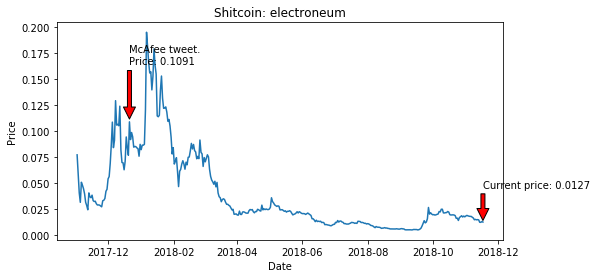

In [564]:
create_graph("electroneum", "2017-12-21")

Shitcoin: burst
Recommendation date: 2017-12-22
Recommendation price: 0.0540
Current price: 0.0063
Total return: -88.25%


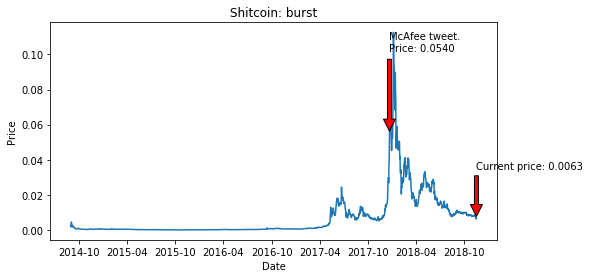

In [565]:
create_graph("burst", "2017-12-22")

Shitcoin: humaniq
Recommendation date: 2017-12-25
Recommendation price: 0.4978
Current price: 0.0174
Total return: -96.50%


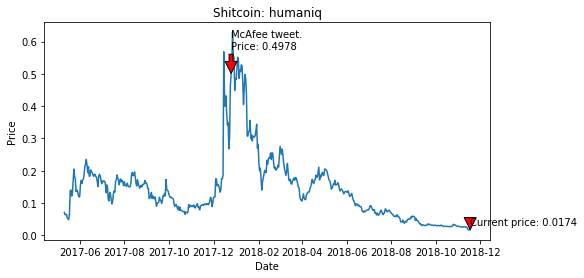

In [568]:
create_graph("humaniq", "2017-12-25")